In [1]:
print(np.sum([1,2,-3,4,-5,6]))

NameError: name 'np' is not defined

In [2]:

vx  = [ 7, 59, 46 , 12, 96, 8 , 46, 76 , 68, 87,107,78, 91,34, 107, 60, 110 ,70, 86 ,115 ,42 ,45, 99 ,56,59 ,39,51,121,45,33,118 ,113]



vy = [ 49, 31,80,43 ,46,32,18,16 ,41, 25,36 ,21 ,61 ,80 ,50 ,43,73,25,108,49,86 ,22 ,30,121,37 ,88 ,95,56,123 ,80 ,53,83]



vz = [ 73,73, 25, 68, 91, 34, 9,64,107,44, 22, 44, 91, 85, 99, 106, 17, 61, 42, 22, 69, 74, 50, 104, 89, 61, 41, 28, 33, 127, 35, 97]


q = [3,4,5]
q = np.asarray(q)
print (q * q)

NameError: name 'np' is not defined

In [3]:
#vx = [7, 49, 46, 32, 46, 38, 66, 26,58, 67, 77, 38, 61, 24,77,20,50, 50,46,75 ,32,45,29,26,29,89,81, 51, 85,53, 48,33 ]

#vy = [13, 13, 20, 39, 12, 28, 32, 14, 13, 39, 48, 15, 21, 52,  40, 59, 37, 27, 30, 35, 34, 56, 32, 63, 59, 28, 27, 52, 65, 52, 39, 75]

#vz = [ 73 , 73 ,25 , 68, 91, 34, 9,64, 107, 44, 22,44, 91, 85, 99, 106, 17, 61, 42,22,69,74, 50, 104, 89, 61, 41, 28, 33,127, 35,97]

vel = [] 

for i in range(0, len(vx)):
    
    v = [  vx[i], vy[i],vz[i] ]
    
    vel.insert(i,v)

print ('printing all velocities')
print (vel)


#####  Now we have our array of velocity arrays, lets do some work on them


vel = np.asarray(vel)

v_av = vel.mean(axis=0)
#print ('printing v_av')
#print(v_av)
#print('printing range vx')
#print(range(31))


v_difference = []
v_difference_sq = []
v_difference_4 = []


for i in range(0, 32):
    
    v_dif = [  vx[0] - vx[i  ] , vy[0]  - vy[i ]  ,vz[0] - vz[i  ] ]
    v_dif = np.asarray(v_dif)
    v_dif_mag = np.sqrt(  (v_dif[0])**2  + (v_dif[1])**2 + (v_dif[2])**2 )
    
 
    
    v_difference.insert(i,v_dif_mag)

v_difference = np.asarray(v_difference)



average_difference   = v_difference.mean(axis=0)
average_difference_2 = average_difference**2
average_difference_4 = average_difference**4

print('printing average difference 2 and 4th')
print (average_difference, average_difference_2,average_difference_4)
#print('printing difference')
#print(v_difference)



diff = vel - v_av   

#print ('printing diff')
#print (diff)

diff_sq = [] 



for i in range(0, len(vx) ):
    
    v_sq = diff[i] * diff[i] 
    diff_sq.insert(i,v_sq)
    


diff_sq = np.asarray(diff_sq)
#print (np.var(diff))

var = np.var(diff, axis=0)
print ('printing diff sq')

print(diff_sq)
#print (np.sum(diff_sq/32))

#print(np.sum(var))
dispersion = np.sqrt(np.sum(var))

print('ratio squared') 


print( average_difference_2 / (2 * (dispersion)**2)  ) 
print ('the two')
print(average_difference_2)
print( (2 * (dispersion)**2)  )
print ('printing disp')
print( 2 * (dispersion)**2 )
print ( 5931.029297 / 5840.211914)



print('ratio 4th' )


print( average_difference_4 / ((48/9) * (dispersion)**4) )

printing all velocities
[[7, 49, 73], [59, 31, 73], [46, 80, 25], [12, 43, 68], [96, 46, 91], [8, 32, 34], [46, 18, 9], [76, 16, 64], [68, 41, 107], [87, 25, 44], [107, 36, 22], [78, 21, 44], [91, 61, 91], [34, 80, 85], [107, 50, 99], [60, 43, 106], [110, 73, 17], [70, 25, 61], [86, 108, 42], [115, 49, 22], [42, 86, 69], [45, 22, 74], [99, 30, 50], [56, 121, 104], [59, 37, 89], [39, 88, 61], [51, 95, 41], [121, 56, 28], [45, 123, 33], [33, 80, 127], [118, 53, 35], [113, 83, 97]]


NameError: name 'np' is not defined

In [21]:
# Now calculate the dispersion the long way 






In [22]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# NOTES : Outline of all functions in order and useage 

### Function that loads in any coordinate velocity and mass data of a given halo and returns these as numpy array and saved .npy files

### Function that Creates radial bins and denisty hist values for a simple rho(r) plot, and also make V_dispersion Profile. These radial bins are later used to make V_disperison as well

### NOTE:  Make sure radial bins are reset so that they are in the binning value in the middle of the bin

# remember to plot the values at the middle of the bin (not the edges)

## Set the halo to be loaded for analysis

In [23]:
halo = 'm12c'   

In [24]:
%matplotlib inline
import numpy as np
from random import seed
from random import random
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import scipy.integrate as integrate
import matplotlib as mpl

# Must use aitoff module from Case Western
import aitoff as at
from matplotlib.backends.backend_pdf import PdfPages
d = 8.3   # kpc
conversion =  ( (1.989e30  * 5.586792179e26) **2 /  ((3.086e21)**5  )  )  # Conversion from Solar masses to particle physics units
plot_bins = 80

path = "/Users/danmckeown/" # path

my_rad = 300.0

# Functions 

# 1). 

In [25]:
def make_coords(coord_file,mass,velocities,mult_by):
    
    x = coord_file[:,0]
    y = coord_file[:,1]
    z = coord_file[:,2]  
            
    radius = np.sqrt(x*x + y*y  + z*z  )
    mask = radius <= my_rad
    radius_final = radius[mask]
    velocities_final = velocities[mask]
    velocities_final = np.asarray( velocities_final)
    part_mass = mass[0] * mult_by
    new_mass = np.zeros(len(radius_final))
    new_mass[:] = part_mass        
    x = x[mask]
    y = y[mask]
    z = z[mask]  
    #return x,y,z,radius_final,new_mass,part_mass        
    return x,y,z,radius_final,new_mass,velocities_final,part_mass

# 2). 

In [26]:
def make_hist(radius,chosen_bins, masses, total_distance ):
    hist, bin_edges = np.histogram(radius, bins = chosen_bins, weights = masses, range = [0,total_distance])
    #...For Density plot                                                                                                                                                                        
    Vol = np.zeros(len(hist))
    for j in range(0, len(hist)):
        Vol[j] = 4.0/3.0* np.pi * (chosen_bins[j +1]**3 - chosen_bins[j]**3)
    
    # function adds an extra element we need to delete                                                                                                                                          
    chosen_bins_new = chosen_bins #chosen_bins[:-1]
    Den = list(map(truediv, hist, Vol))
    chosen_bins_new = np.asarray(chosen_bins_new)
    # Select the midpoint of each radial bin to plot
    chosen_bins_final =  (    chosen_bins_new[1:] + chosen_bins_new[:-1]) / 2.0 
    Den = np.asarray(Den)
    return chosen_bins_final,Den

# 3).

In [27]:
def make_velocities(velocities,radius,radial_bins,mult_by_vel):
    
    v_xav_dark = np.sum((velocities[:,0])) / ( len(velocities))
    v_yav_dark = np.sum((velocities[:,1])) / ( len(velocities))
    v_zav_dark = np.sum((velocities[:,2])) / ( len(velocities))

    v_av = [v_xav_dark,v_yav_dark,v_zav_dark ]

    velocities = velocities - v_av
    
    v_x = velocities[:,0]
    v_y = velocities[:,1]
    v_z = velocities[:,2]
    
    v_xav_dark = np.sum((velocities[:,0])) / ( len(velocities))
    v_yav_dark = np.sum((velocities[:,1])) / ( len(velocities))
    v_zav_dark = np.sum((velocities[:,2])) / ( len(velocities))

    v_av = [v_xav_dark,v_yav_dark,v_zav_dark ]

    dispersion = np.zeros(radial_bins.size - 1)
 #   radial_bins = radial_bins[:-1]
    radial_bins_final =  ( radial_bins[1:] + radial_bins[:-1]) / 2.0 
    
    for i in range(1, len(radial_bins)): # Start at i = 1 since we're making shells                                                                                                                                                                        
     #   print (len(radius_dark),radial_bins_dark[i-1],radial_bins_dark[i]  )
        mask = (radius >  radial_bins[i-1]) & (radius < radial_bins[i])
        v_avg_dark = velocities[mask].mean(axis=0)
        difference_dark = velocities[mask] - v_avg_dark
        coord_var_dark = np.var(difference_dark, axis=0)
        dispersion[i-1] = np.sqrt(np.sum(coord_var_dark)) * mult_by_vel   
    return v_av,radial_bins_final,dispersion, v_x , v_y , v_z



# 4). 

In [28]:





def local_density_weighting(file_name, radius, bin_edges,Den):

    rho_local = []
    #file_name = "rho_local_dm_m12i_new.npy"

    for i in range(len(radius)):

        local_d = (np.interp(radius[i] , bin_edges, Den, left= np.max(Den), right = np.min(Den), period=None))
        rho_local.insert( i, local_d )

    np.save(path+"/"+file_name+'.npy',rho_local)
    return rho_local
    

# 5).

In [29]:
def local_velocity_disp_weighting(file_name, radius, bin_edges, dispersion_sq):
    vel_disp_local_p = []
    #file_name = 'vel_disp_local_p'+ str(halo)
    length = len(dispersion_sq)
    final_value = length - 1
    for i in range(len(radius )):
         # Change radial_bins_dark to radial_bins_dark_half_way   , for left , assign the dispersion that is at smallest radii , then right should be value of dispersion at largest radii
        local_vel_p = (np.interp(radius[i] , bin_edges, dispersion_sq, left= dispersion_sq[0] , right= dispersion_sq[final_value], period=None))
        
        local_vel_p = ((local_vel_p) /( 2.99792458e5)**2 )        

        vel_disp_local_p.insert( i, local_vel_p )

    np.save(path+"/"+file_name+'.npy',vel_disp_local_p)
    return vel_disp_local_p
#vel_dm_only_p_wave = local_velocity_disp_weighting(dm_only_file_name_p, radius_dark, radial_bins_dark,dispersion_dark_sq)

# 6). 

In [30]:
def local_velocity_disp_weighting_d_wave(file_name, radius, bin_edges, dispersion_fourth):


    vel_disp_D_WAVE = []
    length = len(dispersion_fourth)
    final_value = length - 1    
   
    for i in range(len(radius )):

        local_vel_d = (np.interp(radius[i] , bin_edges, dispersion, left= dispersion_fourth[0], right= dispersion_fourth[final_value], period=None))
        local_vel_d = ((local_vel_d) /( 2.99792458e5)**4 )

        vel_disp_D_WAVE.insert( i, local_vel_d )

    np.save(path+"/"+file_name+'.npy',vel_disp_D_WAVE)
    return vel_disp_D_WAVE

# 7). 

In [31]:
def coord_trans( x,y,z,d,weights ):

    x = (x + d)
    
    Phi = np.arctan2(y ,x)
    radius = np.sqrt(( x  )*(  x ) + (y )* (y ) + (z )*(z  ) )        
    u = (z  )  / ( radius )
    Theta = np.arccos(u)
    
    Cos_Psi = (x) /(radius)
    
    a = 0.4
    # a is the softening length.  
    
    Angle_weighting =  ( weights) /  (radius + a)**2    # Weights can either be in terms of rho* density  or rho*density *sigma**2,  or rho* density * sigma**4
    
    
    return Phi,Theta,radius,Angle_weighting,Cos_Psi

# NOTE: Just Use 7 for velocities and use velocities weights in place of weighting mass and rho ( in other words multiply it by that)

# 8).

In [32]:
def hammer_projection(Phi_deg_array, Theta_deg_array , Final_weighting, plot_bins,lower_limit,upper_limit,file_name,color_map,title,x_lim,y_lim,run_type,wave_type):
      
    
    lz = 180
    #sampling of aitoff projection
    #RA,l, or Lambda Sgr
    binner1 = np.linspace(-180.,180.,plot_bins)
    #DEC, b, or B Sgr
    binner2 = np.linspace(-90.,90.,plot_bins)
    fig, ax = plt.subplots()#create figure in inches


    ### Moment AT.Project is used
    l, b = at.project(Phi_deg_array,Theta_deg_array,lz)

    #Create density map
    #img, xbins,ybins = np.histogram2d(ra,dec, weights = Angle_weighting_NFW, bins=(binner1,binner2) )
    img, xbins,ybins = np.histogram2d(l,b, weights = Final_weighting, bins=(binner1,binner2) )

    img = np.log10(img)

    print(len(img))

    dark_only_vmax = np.max(img)
    dark_only_vmin = np.percentile(img, 25)

    print(np.max(img))
    print(np.median(img))
    print(np.percentile(img, 25))
    print(np.min(img))

    #Import a module to make minor ticks
    from matplotlib.ticker import AutoMinorLocator
    #Set up to tell matplotlib to autoselect minor tick locations
    minorLocator   = AutoMinorLocator()

    #Actually tell matplotlib to find best minor tick locations
    ax.xaxis.set_minor_locator(minorLocator)


    ax.yaxis.set_minor_locator(minorLocator)
    #Turn minor ticks on
    ax.minorticks_on()
    #set the width of the ticks
    ax.tick_params(which='both',width=1)
    #set the length of the major ticks
    ax.tick_params(which='major',length=7)
    #set length of the minor ticks
    ax.tick_params(which='minor',length=3)
    ax.set_ylim([-25.,90.])
    ax.set_ylabel('DEC',fontsize=18)
    ax.set_xlabel('RA',fontsize=18)

    #fig.gca().invert_xaxis()


    #create a figure to plot the histogram on
    fig, ax = plt.subplots(figsize=(12.,6.))#create figure in inches
    plot = ax.imshow(img.T,origin='lower',extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
                     cmap=plt.cm.binary,interpolation='bicubic',aspect='auto' #try a different interpolation method for the image
                     ,vmin = lower_limit, vmax = upper_limit)
    #Add a nice little color bar
    cbar = fig.colorbar(plot)
    cbar.set_label('Density of Dark Matter')
    #put a gid on the plot 
    at.gridlines(lz,fig,ax)
    #Actually tell matplotlib to find best minor tick locations
    ax.xaxis.set_minor_locator(minorLocator)
    ax.yaxis.set_minor_locator(minorLocator)
    #Turn minor ticks on

    ax.minorticks_on()
    #set the width of the ticks
    ax.tick_params(which='both',width=1)
    #set the length of the major ticks
    ax.tick_params(which='major',length=7)
    #set length of the minor ticks
    ax.tick_params(which='minor',length=3)

    #remove axis labels because they are meanles in an aitoff projection
    fig.gca().get_xaxis().set_visible(False)
    fig.gca().get_yaxis().set_visible(False)
    fig.gca().invert_xaxis()


    import matplotlib as mat

    #create a figure to plot the histogram on
    fig, ax = plt.subplots(figsize=(14.,10.))#create figure in inches
    #create a colorbar axis
    cax, kw = mat.colorbar.make_axes(ax,pad=0,shrink=1.0,location='top',fontsize = 14)


    #imshow will also do RGB if you feed it a 3d or 4d array ( the last dimension being opcacity)
    plot = ax.imshow(img.T,origin='lower',extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
                     cmap= color_map,#try a different color scheme for the image
                     interpolation='bilinear',aspect='auto', 
                     vmin = lower_limit, vmax = upper_limit)
    #Add a nice little color bar
    cbar = fig.colorbar(plot,cax=cax,orientation='horizontal')
    
    cbar.set_label(title, fontsize = 25 , y = 1.28 )
    
    cbar.ax.xaxis.set_ticks_position('top')
    cbar.ax.xaxis.set_label_position('top')
    cbar.ax.tick_params(labelsize=20) 
    
    #mpl.pyplot.text( 21.1,19, str(halo)+': S-Wave DMO', fontsize = 17, color = 'black' )
    mpl.pyplot.text( x_lim[0],y_lim[0],  wave_type , fontsize = 34, color = 'black' )
    mpl.pyplot.text( x_lim[1],y_lim[1], str(halo) , fontsize = 34, color = 'black' )
    mpl.pyplot.text( x_lim[2],y_lim[2],  run_type , fontsize = 34, color = 'black' )
   
        
    #cbar.ax.set_xticklabels()
    #put a gid on the plot 
    at.gridlines(lz,fig,ax)
    #Actually tell matplotlib to find best minor tick locations
    ax.xaxis.set_minor_locator(minorLocator)
    ax.yaxis.set_minor_locator(minorLocator)
    #Turn minor ticks on
    ax.minorticks_on()
    #set the width of the ticks
    ax.tick_params(which='both',width=1)
    #set the length of the major ticks
    ax.tick_params(which='major',length=8)
    #set length of the minor ticks
    ax.tick_params(which='minor',length=3)

    #remove axis labels because they are meanles in an aitoff projection
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    #because it drops all axes for whatever reason
    cax.get_xaxis().set_visible(True)
    ax.set_xlim([180.,-180.])
    ax.set_ylim([-90.,90.])
    
    plt.savefig(path + '/' +file_name_of_hammer+wave_type+str(halo)+'.png')
    
    
    
    print ('printing max value of DJ/DO')
    print (np.max(img))
    print ('printing x and y bins')
    return xbins,ybins



# 9). 

In [33]:
def Angle_convert( Theta,Phi):


    Theta_deg = np.degrees(Theta - np.pi/2)
    Phi_deg = np.degrees(Phi + np.pi)    

    Theta_deg_array = np.asarray( Theta_deg)
    Phi_deg_array = np.asarray( Phi_deg)

    
    return Theta_deg_array,Phi_deg_array


# 10).

In [34]:

def recenter( coords, dm_mass, center_range):

    radius = np.sqrt ( coords[:,0]*coords[:,0] +  coords[:,1]*coords[:,1] + coords[:,2]*coords[:,2] )

    index1 = radius < center_range

    xyz2 = coords[index1]
    
    dm_mass2 = dm_mass[index1]

    mp = 0
    for j in range (0, len(xyz2)):
    # sum all the mass times coordinates                                                                                                                                                                                                \

        mp = dm_mass2[j] * xyz2[j,:] + mp

    DM_mass_tot1 = len(xyz2) * dm_mass2[0]
    
    DM_cm = mp/DM_mass_tot1
    print ('printing dm cm')
    print (DM_cm)
    print(dm_mass2[0])
    new_coords = coords - DM_cm    
    
    
    return new_coords

# 11).

In [35]:

def recenter_bary( coords, dm_mass, center_range):

    radius = np.sqrt ( coords[:,0]*coords[:,0] +  coords[:,1]*coords[:,1] + coords[:,2]*coords[:,2] )

    index1 = radius < center_range

    xyz2 = coords[index1]
    
    dm_mass2 = dm_mass[index1]

    mp = 0
    for j in range (0, len(xyz2)):
    # sum all the mass times coordinates                                                                                                                                                                                                \

        mp = dm_mass2[j] * xyz2[j,:] + mp

    DM_mass_tot1 = len(xyz2) * dm_mass2[0]
    
    DM_cm = mp/DM_mass_tot1
    print ('printing dm cm')
    print (DM_cm)
    print(dm_mass2[0])
    new_coords_bary = coords - DM_cm    
    
    
    return new_coords_bary

# 12). 

In [36]:
import numpy as np
import ctypes
import math
import os.path
import struct
import array

def checklen(x):
    return len(np.array(x,ndmin=1));
def fcor(x):
    return np.array(x,dtype='f',ndmin=1)
def vfloat(x):
    return x.ctypes.data_as(ctypes.POINTER(ctypes.c_float));

def ok_scan(input,xmax=1.0e10,pos=0):
    if (pos==1):
        return (np.isnan(input)==False) & (abs(input)<=xmax) & (input > 0.);
    else:
        return (np.isnan(input)==False) & (abs(input)<=xmax);
    
    
    
    
def get_particle_hsml( x, y, z, vx, vy, vz, DesNgb=32, Hmax=0.):
    
    
    x=fcor(x); y=fcor(y); z=fcor(z); N=checklen(x); 

    vx=fcor(vx); vy=fcor(vy); vz=fcor(vz); N=checklen(x); 
    
    ok=(ok_scan(x) & ok_scan(y) & ok_scan(z));
    ok= ok & (ok_scan(vx) & ok_scan(vy) & ok_scan(vz));

    x=x[ok]; y=y[ok]; z=z[ok];
    vx=vx[ok]; vy=vy[ok]; vz=vz[ok];

    
    if(Hmax==0.):
        dx=np.max(x)-np.min(x); dy=np.max(y)-np.min(y); dz=np.max(z)-np.min(z); ddx=np.max([dx,dy,dz]);
        Hmax=5.*ddx*(np.float(N)**(-1./3.)); ## mean inter-particle spacing                                                                                                                                                                                   

  
  ##### now accessing the C code

    import inspect
    exec_call = "/Users/danmckeown/repos/FIRE_studio/firestudio/utils/stellar_utils/c_libraries/StellarHsml/starhsml.so"
    
    # calling program in the dir.
    h_routine=ctypes.cdll[exec_call];

    # These are python variables which we are casting as C variables
    h_out_cast=ctypes.c_float*N; H_OUT=h_out_cast();
    v_out_cast=ctypes.c_float*N; V_OUT=v_out_cast();
    v_mag_cast=ctypes.c_float*N; V_MAG=v_mag_cast();
    # First variable name needs to match last
    
    # These lines create the pointers that are passed to the C code  ( ctypes.byref(H_OUT), ctypes.byref(V_OUT))
    
    
    ## main call to the hsml-finding routine
    h_routine.stellarhsml( ctypes.c_int(N), \
    ## load the routine we need                                                                                                                                                                                                                               
    
        vfloat(x), vfloat(y), vfloat(z), \
        vfloat(vx), vfloat(vy), vfloat(vz), ctypes.c_int(DesNgb), \
        ctypes.c_float(Hmax), ctypes.byref(H_OUT), ctypes.byref(V_OUT),ctypes.byref(V_MAG)
    )                       
                          
    ## now put the output arrays into a useful format 
    
    # These two lines below get the pointers out
    h = np.ctypeslib.as_array(np.copy(H_OUT));                     
    vdisp = np.ctypeslib.as_array(np.copy(V_OUT));
    vmag = np.ctypeslib.as_array(np.copy(V_MAG));
    
    return h, vdisp,vmag 
                          
   

# Files 

In [16]:
R_virial_bary =  np.load(path+"/"+'virial_radiusm12c.npy')

R_virial_dark =  np.load(path+"/"+'virial_dark'+str(halo)+'.npy')


velocities_bary = np.load(path+"/"+ 'velocities_dm_bary_rotm12c.npy') 

velocities_dark = np.load(path+"/"+ 'final_master_velocities_darkm12c.npy')


dm_mass_dark  = np.load(path+"/"+ 'dm_mass_darkm12c.npy')


dm_mass_bary  = np.load(path+"/"+ 'dm_mass_unrot_bary_m12c.npy')



bary_coords = np.load(path+"/"+'bary_coord_dm_m12c_newest.npy')
 
dark_coords = np.load(path+"/"+ 'dark_coordm12c.npy')
    

print(len(dm_mass_dark))
print(len(velocities_dark))
print(len(dark_coords))   



print(len(bary_coords))
print(len(velocities_bary))
print(len(dm_mass_bary))
   
print(dm_mass_dark[0])
print(dm_mass_bary[0])


32786376
32786376
32786376
150682480
150682480
150682480
42248.33502351941
35181.055915909434


In [17]:

pos_x_dark,pos_y_dark,pos_z_dark,radius_dark,dm_mass_dark_final,velocities_dark_final,dm_only_mass = make_coords(dark_coords,dm_mass_dark,velocities_dark,1.0)

pos_x_bary,pos_y_bary,pos_z_bary,radius_bary,dm_mass_bary_final,velocities_bary_final,dm_bary_mass = make_coords(bary_coords,dm_mass_bary,velocities_bary,1.0)

dm_mass_dark_final = np.asarray(dm_mass_dark_final)
dm_mass_bary_final = np.asarray(dm_mass_bary_final)



print(len(dm_mass_dark_final))
print(len(dm_mass_bary_final))

print(dm_only_mass)
print(dm_bary_mass)

31207040
32220707
42248.33502351941
35181.055915909434


In [18]:
from operator import truediv
my_bins = 100


#binning_dark = np.logspace(np.log10(0.1),np.log10(300.), my_bins)
#binning_bary = np.logspace(np.log10(0.1),np.log10(300.), my_bins)


#dark_radial_bins, Den_dark = make_hist(radius_dark,binning_dark, dm_mass_dark_final, 300 )
#bary_radial_bins, Den_bary = make_hist(radius_bary,binning_bary, dm_mass_bary_final, 300 )

binning_dark = np.logspace(np.log10(0.1),np.log10(300.), my_bins)
binning_bary = np.logspace(np.log10(0.1),np.log10(300.), my_bins)


dark_radial_bins, Den_dark = make_hist(radius_dark,binning_dark, dm_mass_dark_final, 300 )
bary_radial_bins, Den_bary = make_hist(radius_bary,binning_bary, dm_mass_bary_final, 300 )




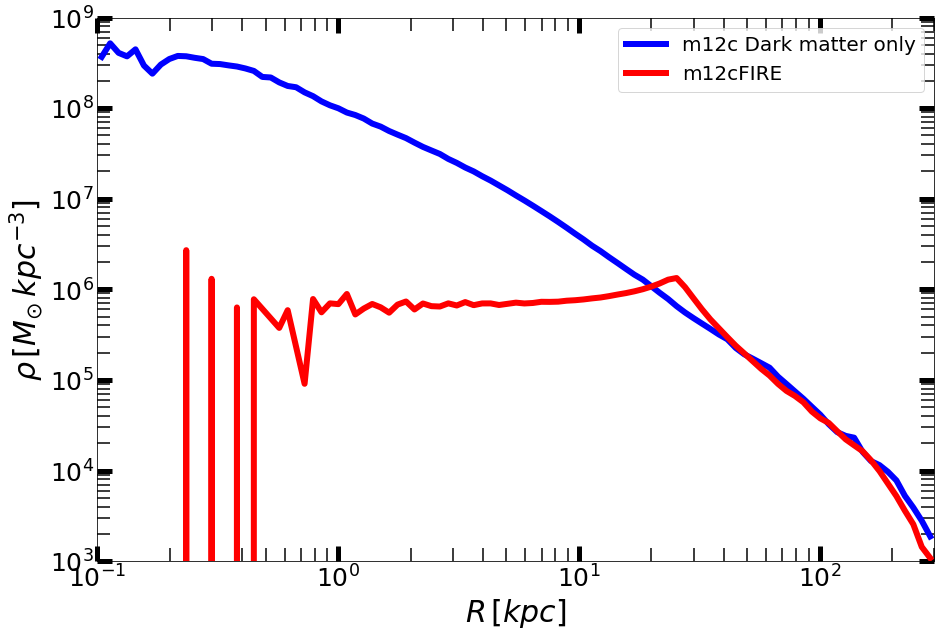

In [19]:
ax_font = 25
txt_font = 30
lw = 4

######################
fig, ax = plt.subplots(figsize=(15,10))
ax.tick_params(which='major',width=5,length=15, direction = 'in', top = True ,right = True, labelsize = ax_font)

ax.tick_params(which='minor',width= 1.5,length=13, direction = 'in', top = True ,right = True, labelsize = ax_font)

plt.xlabel(r'$R\, [kpc]$', fontsize = 30)
plt.ylabel(r'$\rho\, [M_{\odot}\, kpc^{-3}]$', fontsize = 30)
plt.loglog(dark_radial_bins, Den_dark, linewidth= 6, color = 'Blue',label = str(halo)+' Dark matter only' )
plt.loglog(bary_radial_bins,  Den_bary  ,  linewidth= 6, color = 'Red', label = str(halo)+''+'FIRE' )
#plt.loglog(rad,rho_test,color = 'orange', linestyle='--', linewidth=3, label = ' NFW')


np.save(path+"/"+'density_dark_un_norm'+str(halo)+'.npy',Den_dark)
np.save(path+"/"+'dark_bins_rho_un_norm'+str(halo)+'.npy',dark_radial_bins)
np.save(path+"/"+'density_bary_un_norm'+str(halo)+'.npy',Den_bary)
np.save(path+"/"+'bary_bins_rho_un_norm'+str(halo)+'.npy',bary_radial_bins)







plt.xlim(    0.1, 300)
plt.ylim(    10**3, 10**9)
plt.legend(fontsize = 20)
plt.savefig(path +'Dark_matter_density.png')
plt.show()

                         
#=====================  3.Plot the data  =====================

In [20]:
print(np.interp(10000, dark_radial_bins, Den_dark, left= np.max(Den_dark), right= np.min(Den_dark), period=None))
print(np.interp(0, dark_radial_bins, Den_dark, left= np.max(Den_dark), right= np.min(Den_dark), period=None))

local_rho_dark = (np.interp(8.3, dark_radial_bins, Den_dark, left= np.max(Den_dark), right= np.min(Den_dark), period=None))
print (1.e7/local_rho_dark)

mult_dark = 1.e7/local_rho_dark


local_rho_bary = (np.interp(8.3, bary_radial_bins, Den_bary, left= np.max(Den_bary), right= np.min(Den_bary), period=None) )
print(1.e7/local_rho_bary)

mult_bary = 1.e7/local_rho_bary

vel_norm_dark = np.sqrt(mult_dark )

vel_norm_bary = np.sqrt(mult_bary )


1871.7018332494445
518747840.8719115
1.838728598936555
13.64901762489845


In [21]:


pos_x_dark,pos_y_dark,pos_z_dark,radius_dark,dm_mass_dark_final,velocities_dark_final,dm_only_mass = make_coords(dark_coords,dm_mass_dark,velocities_dark,mult_dark)

pos_x_bary,pos_y_bary,pos_z_bary,radius_bary,dm_mass_bary_final,velocities_bary_final,dm_bary_mass = make_coords(bary_coords,dm_mass_bary,velocities_bary,mult_bary)


dm_mass_dark_final = np.asarray(dm_mass_dark_final)
dm_mass_bary_final = np.asarray(dm_mass_bary_final)



print(len(dm_mass_dark_final))
print(len(dm_mass_bary_final))

print(dm_only_mass)
print(dm_bary_mass)


31207040
32220707
77683.22186519802
480186.85225878574


In [22]:
from operator import truediv
my_bins = 100


binning_dark = np.logspace(np.log10(0.1),np.log10(300.), my_bins)
binning_bary = np.logspace(np.log10(0.1),np.log10(300.), my_bins)


dark_radial_bins_new, Den_dark_new = make_hist(radius_dark,binning_dark, dm_mass_dark_final, 300 )
bary_radial_bins_new, Den_bary_new = make_hist(radius_bary,binning_bary, dm_mass_bary_final, 300 )



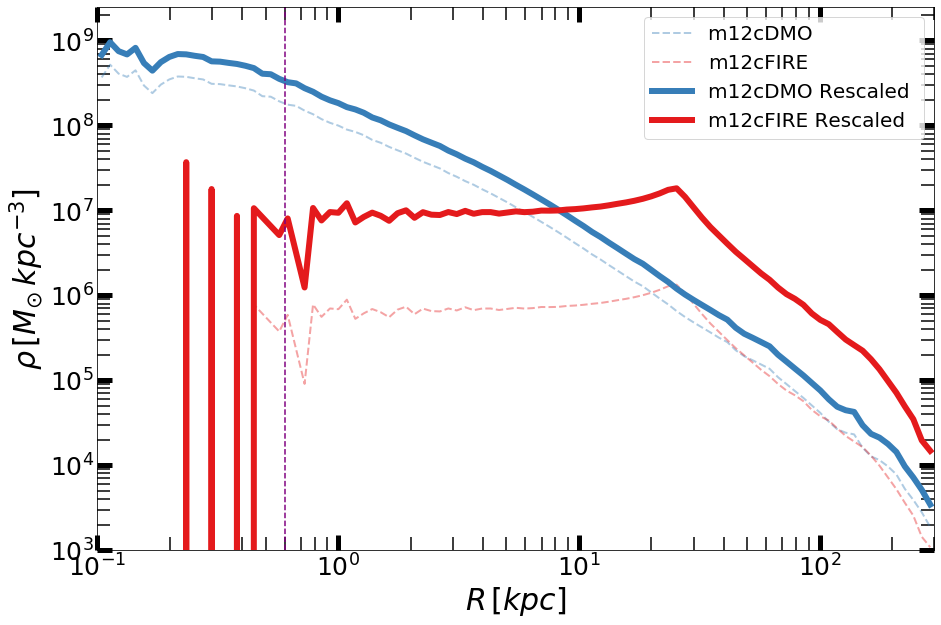

In [23]:


CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']






ax_font = 25
txt_font = 30
lw = 4

######################
fig, ax = plt.subplots(figsize=(15,10))
ax.tick_params(which='major',width=5,length=15, direction = 'in', top = True ,right = True, labelsize = ax_font)

ax.tick_params(which='minor',width= 1.5,length=13, direction = 'in', top = True ,right = True, labelsize = ax_font)

plt.xlabel(r'$R\, [kpc]$', fontsize = 30)
plt.ylabel(r'$\rho\, [M_{\odot}\, kpc^{-3}]$', fontsize = 30)
plt.loglog(dark_radial_bins, Den_dark, linewidth= 2,linestyle='--', alpha =0.4 ,color =  CB_color_cycle[0],label = str(halo)+'DMO ' )
plt.loglog(bary_radial_bins,  Den_bary  ,  linewidth= 2,linestyle='--', alpha = 0.4,color =  CB_color_cycle[7], label = str(halo)+''+'FIRE' )

plt.loglog(dark_radial_bins_new, Den_dark_new, linewidth= 6, color =  CB_color_cycle[0],label = str(halo)+'DMO Rescaled ' )
plt.loglog(bary_radial_bins_new,  Den_bary_new  ,  linewidth= 6, color =  CB_color_cycle[7], label = str(halo)+''+'FIRE Rescaled' )



np.save(path+"/"+'density_dark'+str(halo)+'.npy',Den_dark_new)
np.save(path+"/"+'dark_bins_rho'+str(halo)+'.npy',dark_radial_bins_new)
np.save(path+"/"+'density_bary'+str(halo)+'.npy',Den_bary_new)
np.save(path+"/"+'bary_bins_rho'+str(halo)+'.npy',bary_radial_bins_new)






#plt.loglog(rad,rho_test,color = 'orange', linestyle='--', linewidth=3, label = ' NFW')
plt.axvline(x= .6, color = 'purple',linestyle='--')
#plt.axvline(x= 8.3, color = 'orange',linestyle='--')

plt.xlim(    0.1, 300)
plt.ylim(    10**3, 10**9.4)
plt.legend(fontsize = 20)
plt.savefig(path +'Dark_matter_density'+str(halo)+'.png',   bbox_inches='tight' )
plt.show()

                         
#=====================  3.Plot the data  =====================

In [24]:
print(len(velocities_dark_final))
print(len(velocities_bary_final))


31207040
32220707


In [25]:



#binning_dark = np.arange(0,300,0.5)
#binning_bary = np.arange(0, 300,0.5)
# Old binning above


v_av_dark_un_norm,radial_bins_dark_un_norm,dispersion_dark_basic_un_norm,vx_dark_un_norm, vy_dark_un_norm,vz_dark_un_norm = make_velocities(velocities_dark_final,radius_dark,binning_dark,1.0)

v_av_bary_un_norm,radial_bins_bary_un_norm,dispersion_bary_basic_un_norm , vx_bary_un_norm, vy_bary_un_norm, vz_bary_un_norm = make_velocities(velocities_bary_final,radius_bary,binning_bary,1.0)


/Users/danmckeown/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: Mean of empty slice.
/Users/danmckeown/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/Users/danmckeown/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/danmckeown/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/danmckeown/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:224: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


nan


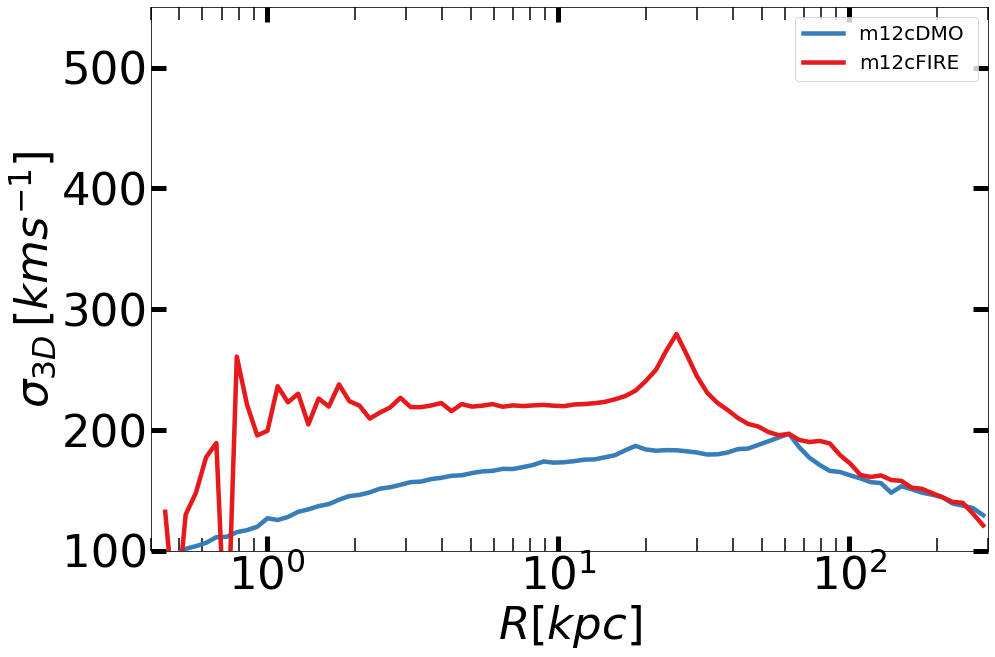

In [26]:

CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']



ax_font = 45
txt_font = 45
lw = 4


fig, ax = plt.subplots(figsize=(15,10))
ax.tick_params(which='major',width=5,length=15, direction = 'in', top = True ,right = True, labelsize = ax_font)

ax.tick_params(which='minor',width= 1.5,length=13, direction = 'in', top = True ,right = True, labelsize = ax_font)

plt.xlabel(r'$R [kpc]$',  fontsize = ax_font)
plt.ylabel(r'$\sigma_{3D}\, [ km s^{-1}]$',  fontsize = ax_font)


plt.semilogx(radial_bins_dark_un_norm, dispersion_dark_basic_un_norm, linewidth= 4.5, color = CB_color_cycle[0],label = str(halo)+ 'DMO ')

plt.semilogx(radial_bins_bary_un_norm, dispersion_bary_basic_un_norm, linewidth= 4.5, color = CB_color_cycle[7],label = str(halo)+ 'FIRE' )


ax.legend(loc=0, fontsize = 20)

plt.xlim(    0.4, 300.)
plt.ylim(    100, 550.0)



np.save(path+"/"+'disp_dark_un_norm'+str(halo)+'.npy',dispersion_dark_basic_un_norm)
np.save(path+"/"+'dark_bins_vel_disp_un_norm'+str(halo)+'.npy',radial_bins_dark_un_norm)

np.save(path+"/"+'disp_bary_un_norm'+str(halo)+'.npy',dispersion_bary_basic_un_norm)
np.save(path+"/"+'bary_bins_vel_disp_un_norm'+str(halo)+'.npy',radial_bins_bary_un_norm)







plt.savefig(path +'Velocity_dispersion_un_norm'+str(halo)+'.png', bbox_inches='tight')
#plt.title( r'$\sigma $' + ' ' + str(halo)+ ' '+ 'DMO vs.FIRE', fontsize = 40)                                                                                                                                                                 
#plt.xlabel(r'$Radius\, [kpc]$', fontsize = 30)

#plt.ylabel(r'$\sigma_{disp}\, [ km s^{-1}]$')

print(np.max(dispersion_bary_basic_un_norm ))


In [27]:



v_av_dark,radial_bins_dark,dispersion_dark_basic, vx_dark, vy_dark,vz_dark = make_velocities(velocities_dark_final,radius_dark,binning_dark,vel_norm_dark)

v_av_bary,radial_bins_bary,dispersion_bary_basic, vx_bary, vy_bary,vz_bary = make_velocities(velocities_bary_final,radius_bary,binning_bary,vel_norm_bary)


/Users/danmckeown/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: Mean of empty slice.


In [ ]:

#smoothing_length_dark, v_disp_dark = get_particle_hsml( pos_x_dark,    pos_y_dark,  pos_z_dark, vx_dark, vy_dark, vz_dark,  DesNgb= 32, Hmax=0. )

smoothing_length_dark, v_disp_dark = get_particle_hsml( pos_x_dark,    pos_y_dark,  pos_z_dark, vx_dark, vy_dark, vz_dark,DesNgb= 32, Hmax=0. )



volumes_d = (4./3.) * np.pi * (smoothing_length_dark)**3


masses_d = 32. * dm_mass_dark_final


rho = masses_d/volumes_d



np.save(path+"/"+'full_density_s_dark_m12c'+'.npy',rho)
 
    
np.save(path+"/"+'full_disp_s_dark_m12c'+'.npy',v_disp_dark)


In [ ]:
disp_dark = np.load(path+"/"+'full_disp_s_dark_m12c'+'.npy')

print(len(disp_dark))

In [ ]:
smoothing_length_bary, v_disp_bary = get_particle_hsml( pos_x_bary,    pos_y_bary,  pos_z_bary, vx_bary, vy_bary, vz_bary, DesNgb= 32, Hmax=0.)



volumes_b = (4./3.) * np.pi * (smoothing_length_bary)**3


masses_b = 32. * dm_mass_bary_final


rho_b = masses_b/volumes_b



np.save(path+"/"+'full_density_s_bary_m12c'+'.npy',rho)
    
np.save(path+"/"+'full_disp_s_bary_m12c'+'.npy',v_disp_bary)








In [ ]:

ax_font = 45
txt_font = 45
lw = 4


fig, ax = plt.subplots(figsize=(15,10))
ax.tick_params(which='major',width=5,length=15, direction = 'in', top = True ,right = True, labelsize = ax_font)

ax.tick_params(which='minor',width= 1.5,length=13, direction = 'in', top = True ,right = True, labelsize = ax_font)

plt.xlabel(r'$Radius\, [kpc]$',  fontsize = ax_font)
plt.ylabel(r'$\sigma_{3D}\, [ km s^{-1}]$',  fontsize = ax_font)


plt.semilogx(radial_bins_dark, dispersion_dark_basic, linewidth= 4.5, color =  CB_color_cycle[0],label = 'M12c DMO ')

plt.semilogx(radial_bins_bary, dispersion_bary_basic, linewidth= 4.5, color =  CB_color_cycle[7],label = 'M12c FIRE ' )







np.save(path+"/"+'disp_dark'+str(halo)+'.npy',dispersion_dark_basic)
np.save(path+"/"+'dark_bins_vel_disp'+str(halo)+'.npy',radial_bins_dark)

np.save(path+"/"+'disp_bary'+str(halo)+'.npy',dispersion_bary_basic)
np.save(path+"/"+'bary_bins_vel_disp'+str(halo)+'.npy',radial_bins_bary)





ax.legend(loc=0, fontsize = 20)

plt.xlim(    0.1, 300)
plt.ylim(    60, 540)

plt.savefig(path +'Velocity_dispersion'+str(halo)+'.png',  bbox_inches='tight')




#plt.title('Velocity Dispersion Comparison:' + str(halo)+ 'DMO vs.FIRE', fontsize = 40)                                                                                                                                                                 
#plt.xlabel(r'$Radius\, [kpc]$', fontsize = 30)

#plt.ylabel(r'$\sigma_{disp}\, [ km s^{-1}]$')

print(np.max(dispersion_bary_basic ))


# Instead of using make velocities to find the velocity dispersion like before, use local velocity dispersion 

In [ ]:
dispersion_dark_sq = 2.0 * dispersion_dark_basic * dispersion_dark_basic

dispersion_bary_sq = 2.0 * dispersion_bary_basic * dispersion_bary_basic

print(dispersion_dark_sq[0]/(3e5)**2,dispersion_bary_sq[0]/(3e5)**2)


local_vel_disp = (np.interp(1 ,radial_bins_bary, dispersion_bary_sq, left= np.max(dispersion_bary_sq), right= np.min(dispersion_bary_sq), period=None))
#local_vel = ((local_vel) /( 2.99792458e5)**4 )
print(local_vel_disp)
plt.semilogx(radial_bins_dark, dispersion_dark_sq, linewidth= 4.5, color = 'blue',label = 'M12i Dark  Only ')

plt.semilogx(radial_bins_bary, dispersion_bary_sq, linewidth= 4.5, color = 'red',label = 'FIRE ' )



In [ ]:
def local_velocity_disp_weighting_p(file_name, radius, bin_edges, dispersion_sq):
    vel_disp_local_p = []
    #file_name = 'vel_disp_local_p'+ str(halo)
    length = len(dispersion_sq)
    final_value = length - 1
    for i in range(len(radius )):
         # Change radial_bins_dark to radial_bins_dark_half_way   , for left , assign the dispersion that is at smallest radii , then right should be value of dispersion at largest radii
        local_vel_p = (np.interp(radius[i] , bin_edges, dispersion_sq, left= dispersion_sq[0] , right= dispersion_sq[final_value], period=None))
        #print(local_vel_p)
        local_vel_p = ((local_vel_p) /( 2.99792458e5)**2 )        
        #print(local_vel_p)
        vel_disp_local_p.insert( i, local_vel_p )

    np.save(path+"/"+file_name+'.npy',vel_disp_local_p)
    return vel_disp_local_p
#vel_dm_only_p_wave = local_velocity_disp_weighting(dm_only_file_name_p, radius_dark, radial_bins_dark,dispersion_dark_sq)

In [ ]:
def local_velocity_disp_weighting_d(file_name, radius, bin_edges, dispersion_fourth):
    vel_disp_local_d = []
    #file_name = 'vel_disp_local_p'+ str(halo)
    length = len(dispersion_fourth)
    final_value = length - 1
    for i in range(len(radius )):
         # Change radial_bins_dark to radial_bins_dark_half_way   , for left , assign the dispersion that is at smallest radii , then right should be value of dispersion at largest radii
        local_vel_d = (np.interp(radius[i] , bin_edges, dispersion_fourth, left= dispersion_fourth[0] , right= dispersion_fourth[final_value], period=None))
        #print(local_vel_p)
        local_vel_d = ((local_vel_d) /( 2.99792458e5)**4 )        
        #print(local_vel_p)
        vel_disp_local_d.insert( i, local_vel_d )

    np.save(path+"/"+file_name+'.npy',vel_disp_local_d)
    return vel_disp_local_d
#vel_dm_only_p_wave = local_velocity_disp_weighting(dm_only_file_name_p, radius_dark, radial_bins_dark,dispersion_dark_sq)

In [ ]:
dispersion_dark_fourth = (48./9.) * dispersion_dark_sq * dispersion_dark_sq

dispersion_bary_fourth = (  48./9.  ) *  dispersion_bary_sq * dispersion_bary_sq


print(dispersion_dark_fourth[0]/(3e5)**4,dispersion_bary_fourth[0]/(3e5)**4)


plt.semilogx(radial_bins_dark, dispersion_dark_sq, linewidth= 4.5, color = 'blue',label = 'M12i Dark  Only ')

plt.semilogx(radial_bins_bary, dispersion_bary_sq, linewidth= 4.5, color = 'red',label = 'M12i Fully Baryonic ' )


## Weighting 

In [ ]:
#dark_only_file_name = '/rho_dm_only_s_wave_'+str(halo)


#rho_local_dm_only = local_density_weighting(dark_only_file_name, radius_dark, radial_bins_dark,Den_dark)



In [ ]:
#dark_bary_file_name = '/rho_bary_s_wave_'+str(halo)


#rho_local_bary = local_density_weighting(dark_bary_file_name, radius_bary, radial_bins_bary,Den_bary)


In [ ]:
# Create filename to send 

dm_only_file_name_p_new = '/vel_dm_only_p_wave_'+str(halo)

vel_dm_only_p_wave = local_velocity_disp_weighting_p(dm_only_file_name_p_new, radius_dark, radial_bins_dark,dispersion_dark_sq)



In [ ]:
dark_bary_file_name_p_new = '/vel_bary_p_wave_'+str(halo)

vel_bary_p_wave = local_velocity_disp_weighting_p(dark_bary_file_name_p_new, radius_bary, radial_bins_bary, dispersion_bary_sq)
          

In [ ]:
rho_local_dm_only_p = np.load(path+"/"+'/vel_dm_only_p_wave_'+str(halo)+'.npy')



# D weighting 

In [ ]:
dm_only_file_name_d = '/vel_dm_only_d_wave_'+str(halo)

vel_dm_only_d_wave_d = local_velocity_disp_weighting_d(dm_only_file_name_d, radius_dark, radial_bins_dark,dispersion_dark_fourth)

In [ ]:
dark_bary_file_name_d = '/vel_bary_d_wave_'+str(halo)

vel_bary_d_wave_d = local_velocity_disp_weighting_d(dark_bary_file_name_d, radius_bary, radial_bins_bary,dispersion_bary_fourth)

# Load files 

In [ ]:
#rho_local_dm_only = np.load(path+"/"+'/rho_dm_only_s_wave_'+str(halo)+'.npy')
#rho_local_bary = np.load(path+"/"+'/rho_bary_s_wave_'+str(halo)+'.npy')
rho_local_dm_only_p = np.load(path+"/"+'/vel_dm_only_p_wave_'+str(halo)+'.npy')
rho_local_bary_p = np.load(path+"/"+'/vel_bary_p_wave_'+str(halo)+'.npy')
rho_local_dm_only_d = np.load(path+"/"+'/vel_dm_only_d_wave_'+str(halo)+'.npy')
rho_local_bary_d = np.load(path+"/"+'/vel_bary_d_wave_'+str(halo)+'.npy')


In [ ]:
print ( rho_local_dm_only_p [ 0])

In [ ]:
#print(len(rho_local_dm_only)) 
#print(len(rho_local_bary )) 
print(len(rho_local_dm_only_p)) 
print(len(rho_local_bary_p)) 
print(len(rho_local_dm_only_d)) 
print(len(rho_local_bary_d )) 

#### 4p/n^2 weighting is only for the sky map, because the bins in the dJ/dOmega plot are the "rings" of width 2pi*dcos(theta)
#### we are doing rings in the dJ/dO plot, but in the sky map we're doing n^2 squares over 4pi steradians

###  IMPORTANT ,  THE CODE BELOW IS OUTDATED AND NEEDS TO BE REPLACED !!!!!!!!!!!!

In [ ]:
plot_bins = 180


rho_local_times_mass_dm_only = dm_mass_dark_final * rho

rho_local_times_mass_dm_only  = ( rho_local_times_mass_dm_only * conversion ) 



Phi_dark_s,Theta_dark_s,radius_dark_s,  Angle_weighting_dark_new_s ,Cos_Psi_dark_s = coord_trans( pos_x_dark ,pos_y_dark ,pos_z_dark,d, rho_local_times_mass_dm_only )


Angle_weighting_dark_new_s_conv = Angle_weighting_dark_new_s / ( 4.0 * np.pi/  ( plot_bins * plot_bins)) 


# Careful! Don't do the conversion twice !!!!!!!



Theta_deg_dark_array_s, Phi_deg_dark_array_s  =  Angle_convert( Theta_dark_s,Phi_dark_s)





In [ ]:
# tested  for 0,180
plot_bins = 180

#r'$R\, [kpc]$'

lower_limit,upper_limit = 21., 24.


title  = r'$ log(dJ_{s} /d\Omega) { GeV^{2} cm^{-5} Sr^{-1} } $' 

    #mpl.pyplot.text( 21.1,19, str(halo)+': S-Wave DMO', fontsize = 17, color = 'black' )

    
    
x_lim = [21.1,21.1 , 23.5]

y_lim = [18, -13, 18]

run_type = 'DMO'

wave_type = 's-wave'


lower_limit,upper_limit = 21, 24

file_name_of_hammer = 'Hammer_dm_only_full'


x_bin,y_bin = hammer_projection(Phi_deg_dark_array_s, Theta_deg_dark_array_s ,Angle_weighting_dark_new_s_conv, plot_bins,lower_limit,upper_limit,file_name_of_hammer,plt.cm.plasma,title,x_lim, y_lim, run_type,wave_type)

#print(x_bin,y_bin)

# Resolution Limit 

In [ ]:
print ( np.degrees (np.arctan( 0.4/8.3)) )

# Baryonic Analysis

## Baryonic Weighting

In [ ]:

smoothing_length_bary = get_particle_hsml( pos_x_bary,  pos_y_bary,  pos_z_bary,  DesNgb= 32, Hmax=0. )




volumes_b = (4./3.) * np.pi * (smoothing_length_bary)**3


masses_b = 32. * dm_mass_bary_final


rho_bary = masses_b /volumes_b 


In [ ]:
np.save(path+"/"+'full_density_s_bary_m12c_full'+'.npy',rho_bary)
    

In [ ]:

mass_particles_dm = np.full((len(rho),),dm_only_mass )
mass_particles_b = np.full((len(rho_bary),),dm_bary_mass )

# Final rho weight dm only s wave
rho = np.asarray(rho) 
rho_local_times_mass_dm_only = mass_particles_dm * rho

print(len(rho_local_times_mass_dm_only))

# Final rho weight bary wave 
rho_local_bary = np.asarray(rho_bary) 
rho_local_times_mass_b = mass_particles_b * rho_local_bary




print(len(rho_local_times_mass_b))
# Final P weight

rho_local_dm_only_p = np.asarray( rho_local_dm_only_p)

final_dm_p_weight =   rho_local_times_mass_dm_only * rho_local_dm_only_p  # rename to sigma squared local dm only 

print ('first')
print(rho_local_dm_only_p[1000])


print(len(final_dm_p_weight))
rho_local_bary_p = np.asarray( rho_local_bary_p)
final_bary_p_weight =  rho_local_times_mass_b  *rho_local_bary_p

print(len(final_bary_p_weight))
# Final D weight 

rho_local_dm_only_d = np.asarray( rho_local_dm_only_d)
final_dm_d_weight =   rho_local_times_mass_dm_only * rho_local_dm_only_d

print(len(final_dm_d_weight))

rho_local_bary_d = np.asarray( rho_local_bary_d)
final_bary_d_weight =  rho_local_times_mass_b  *rho_local_bary_d

print(len(rho_local_times_mass_b))



In [ ]:
plot_bins = 180


rho_local_times_mass_dm_bary = dm_mass_bary_final * rho_bary

rho_local_times_mass_dm_bary  = ( rho_local_times_mass_dm_bary * conversion ) 




Phi_bary_s_f,Theta_bary_s_f,radius_bary,  Angle_weighting_bary_new_s_f ,Cos_Psi_bary_s_f = coord_trans( pos_x_bary ,pos_y_bary ,pos_z_bary ,d, rho_local_times_mass_dm_bary )


Angle_weighting_bary_new_s_conv_f = Angle_weighting_bary_new_s_f / ( 4.0 * np.pi/  ( plot_bins * plot_bins)) 


# Careful! Don't do the conversion twice !!!!!!!



Theta_deg_bary_array_s_f, Phi_deg_bary_array_s_f  =  Angle_convert( Theta_bary_s_f,Phi_bary_s_f)







# tested  for 0,180
plot_bins = 180




title  = r'$ log(dJ_{s} /d\Omega) { GeV^{2} cm^{-5} Sr^{-1} } $' 

    #mpl.pyplot.text( 21.1,19, str(halo)+': S-Wave DMO', fontsize = 17, color = 'black' )

    
    
x_lim = [21.1,21.1 , 23.5]

y_lim = [18, -13, 18]

run_type = 'FIRE'

wave_type = 's-wave'


lower_limit,upper_limit = 21, 24

file_name_of_hammer = 'Hammer_bary_only_full_f'




x_bin,y_bin = hammer_projection(Phi_deg_bary_array_s_f, Theta_deg_bary_array_s_f ,Angle_weighting_bary_new_s_conv_f , plot_bins,lower_limit ,upper_limit ,file_name_of_hammer,plt.cm.plasma,title,x_lim, y_lim,run_type, wave_type)

#print(x_bin,y_bin)


# Now make plots for P weights 

In [ ]:
plot_bins = 180


final_dm_p_weight = (  final_dm_p_weight * conversion ) 



Phi_dark_p,Theta_dark_p,radius_dark_p,Angle_weighting_dark_p,Cos_Psi_dark_p = coord_trans( pos_x_dark ,pos_y_dark ,pos_z_dark,d, final_dm_p_weight )


Angle_weighting_dark_p_conv   =   (Angle_weighting_dark_p)  / ( 4. * np.pi /  ( plot_bins * plot_bins)) 

Theta_deg_dark_array_p, Phi_deg_dark_array_p  =  Angle_convert( Theta_dark_p,Phi_dark_p)




In [ ]:
# tested  for 0,180
plot_bins = 180

lower_limit,upper_limit = 15.0, 18.0

file_name_of_hammer = 'Hammer_dm_only'


title  = r'$ log(dJ_{p} /d\Omega) { GeV^{2} cm^{-5} Sr^{-1} } $' 



    
x_lim = [15.1, 15.1 , 17.6]

y_lim = [11.7, -18.6, 11.7]

run_type = 'DMO'

wave_type = 'p-wave'



x_bin,y_bin = hammer_projection(Phi_deg_dark_array_p,Theta_deg_dark_array_p ,Angle_weighting_dark_p_conv, plot_bins,lower_limit,upper_limit,file_name_of_hammer,plt.cm.viridis,title,x_lim, y_lim, run_type,wave_type)

#print(x_bin,y_bin)

In [ ]:
plot_bins = 180



final_bary_p_weight =  final_bary_p_weight * conversion  


Phi_bary_p, Theta_bary_p, radius_bary_p, Angle_weighting_bary_p ,Cos_Psi_bary_p = coord_trans( pos_x_bary ,pos_y_bary ,pos_z_bary,d, final_bary_p_weight )



Angle_weighting_bary_p_conv = ( Angle_weighting_bary_p)  /  ( 4. * np.pi  /  ( plot_bins * plot_bins)) 


Theta_deg_bary_array_p, Phi_deg_bary_array_p  =  Angle_convert( Theta_bary_p, Phi_bary_p)


In [ ]:
# tested  for 0,180
plot_bins = 180

title = 'p-wave FIRE' + ''+ ' Log(Js}) Gev^2 cm^-5  Sr^{-1}'
lower_limit,upper_limit = 15.0, 18.0



title  = r'$ log(dJ_{p} /d\Omega) { GeV^{2} cm^{-5} Sr^{-1} } $'


x_lim = [15.1, 15.1 , 17.6]

y_lim = [11.7, -18.6, 11.7]

run_type = 'FIRE'

wave_type = 'p-wave'




file_name_of_hammer = 'Hammer_bary_'




hammer_projection(Phi_deg_bary_array_p,  Theta_deg_bary_array_p,   Angle_weighting_bary_p_conv , plot_bins,lower_limit,upper_limit,file_name_of_hammer,plt.cm.viridis,title,x_lim, y_lim,run_type, wave_type)



#print(x_bin,y_bin)

# D Weights

In [ ]:
final_dm_d_weight  = ( final_dm_d_weight * conversion  )



Phi_dark_d, Theta_dark_d, radius_dark_d, Angle_weighting_dark_d, Cos_Psi_dark_d = coord_trans( pos_x_dark ,pos_y_dark ,pos_z_dark,d, final_dm_d_weight )


plot_bins = 180


Angle_weighting_dark_new_d_conv = ( Angle_weighting_dark_d )  / ( 4. * np.pi /  ( plot_bins * plot_bins)) 



Theta_deg_dark_array_d, Phi_deg_dark_array_d  =  Angle_convert( Theta_dark_d , Phi_dark_d)



In [ ]:
# tested  for 0,180
plot_bins = 180

title  = r'$ log(dJ_{d} /d\Omega) { GeV^{2} cm^{-5} Sr^{-1} } $'





x_lim = [9.1, 9.1 , 11.6]

y_lim = [6.3, -23.3, 6.3]

run_type = 'DMO'

wave_type = 'd-wave'



lower_limit,upper_limit = 9.0,12.0

file_name_of_hammer = 'hammer_dm_only_'


x_bin,y_bin = hammer_projection(Phi_deg_dark_array_d , Theta_deg_dark_array_d ,Angle_weighting_dark_new_d_conv, plot_bins,lower_limit,upper_limit,file_name_of_hammer,plt.cm.magma,title,x_lim, y_lim,run_type, wave_type)

#print(x_bin,y_bin)

In [ ]:
plot_bins = 180

final_bary_d_weight =  final_bary_d_weight * conversion   

Phi_bary_d,Theta_bary_d,radius_bary_d,Angle_weighting_bary_d,Cos_Psi_bary_d = coord_trans( pos_x_bary ,pos_y_bary ,pos_z_bary,d, final_bary_d_weight )



Angle_weighting_bary_new_d_conv = ( Angle_weighting_bary_d   ) /  ( 4 * np.pi/  ( plot_bins * plot_bins)) 
#Angle_weighting_bary_new_dj_do = ( Angle_weighting_bary * conversion )  # /( 4 * np.pi/  ( plot_bins * plot_bins)) 


Theta_deg_bary_array_d, Phi_deg_bary_array_d  =  Angle_convert( Theta_bary_d, Phi_bary_d )


In [ ]:
# tested  for 0,180
plot_bins = 180
title  = r'$ log(dJ_{d} /d\Omega) { GeV^{2} cm^{-5} Sr^{-1} } $'

x_lim = [9.1, 9.1 , 11.6]

y_lim = [6.3, -23.3, 6.3]

run_type = 'FIRE'

wave_type = 'd-wave'



lower_limit,upper_limit = 9, 12

file_name_of_hammer = 'hammer_bary_'


hammer_projection(Phi_deg_bary_array_d , Theta_deg_bary_array_d ,   Angle_weighting_bary_new_d_conv , plot_bins,lower_limit,upper_limit,file_name_of_hammer,plt.cm.magma,title, x_lim, y_lim,run_type, wave_type)



#print(x_bin,y_bin)


# Create J factor Plots for Velocity Independent J factors

# 10).

In [ ]:
def J_( Cos_Psi, Final_weights):   
# Cos_Psi is x/r  ( an array of coords)    
    J_bins = 35    

    

    sin_bins = np.logspace( -2.0, 0, J_bins)

    Cos_Psi_bins = np.sqrt(1. - (sin_bins)**2 )


    Cos_Psi_bins_reverse = Cos_Psi_bins[::-1]    
    
    
    #Cos_Psi_bins_reverse = Cos_Psi_bins[::-1]


    J_factor , bin_edges_psi = np.histogram(Cos_Psi,  bins = Cos_Psi_bins_reverse,  weights = Final_weights)
    # Where the particles are, their weights, the bins
    
    print('bin check')
    J_factor_reverse = J_factor[::-1]
    
    print(bin_edges_psi)
    bin_edges_psi_reverse = bin_edges_psi[::-1]
    
    print(Cos_Psi_bins_reverse)
    
    J_factor = np.array(J_factor,dtype=float ) 
        
    
    J_factor_reverse = np.array(J_factor_reverse,dtype=float ) 
    #print('bin edges')
    #print(bin_edges_psi)
    
    bin_edges_psi_final = np.degrees(np.arccos(bin_edges_psi)) 
    
    #bin_edges_psi_final =  bin_edges_psi_final[:-1]
    
    
    bin_edges_psi_final_reverse = bin_edges_psi_final[::-1]
    
    d_theta = np.diff(bin_edges_psi_final_reverse )
    #bin_edges_psi_final_reverse = bin_edges_psi_final_reverse[:-1]
    
    print('printing bins')
    print(bin_edges_psi_final_reverse)
    
    print(len( bin_edges_psi_final  ), len( J_factor))

    J_factor_sum = np.cumsum(J_factor_reverse,axis=0)



    
    return   J_factor, J_factor_reverse,J_factor_sum, bin_edges_psi,bin_edges_psi_reverse, bin_edges_psi_final, bin_edges_psi_final_reverse, d_theta

# 11).

In [ ]:

def J_factor_plots( reverse_dark_bins , reverse_bary_bins, J_factor_dark_sum,J_factor_bary_sum, x_lim, y_lim, wave_type,y_minimum ,y_maximum  ):
 
  
    ax_font = 45
    txt_font = 45
    lw = 4


    fig, ax = plt.subplots(figsize=(15,10))
    ax.tick_params(which='major',width= 3,length=15, direction = 'in', top = True ,right = True, labelsize = ax_font)

    ax.tick_params(which='minor',width= 1.5,length=13, direction = 'in', top = True ,right = True, labelsize = ax_font)

    plt.xlabel(r'$ \, \Psi [deg] $', fontsize = 30)

    plt.ylabel(r'$J (< \Psi) \, [ GEV ^{2} cm^{-5} ]$', fontsize = 30)
  

    mpl.pyplot.text( x_lim,y_lim, str(halo)+':'+ wave_type , fontsize = 30, color = 'black' )

    #plt.semilogy(degree_same, J_factor_sum,color = 'Blue',linewidth= 6,label = "" )
    plt.semilogy(reverse_dark_bins, J_factor_dark_sum,color =  CB_color_cycle[0],linewidth= 6,label = " DMO " )
    plt.semilogy(reverse_bary_bins, J_factor_bary_sum,color =  CB_color_cycle[7],linewidth= 6,label = "FIRE" )
    plt.legend(fontsize = 20)
    #plt.title('Dark Matter Only', fontsize = 30)

    plt.xlim([0,20])
    #plt.ylim ( [10**17 , 10 **25])
    plt.savefig(path +'/J_cumulative'+str(wave_type)+str(halo)+'.png',  bbox_inches='tight' )
    plt.show()



# 12). 

In [ ]:
def DJ_plots(d_theta,  bin_edges_psi,  J_factor_reverse):

    d_theta_final=   np.radians((d_theta)) 

    print(len((bin_edges_psi_dark )))


    solid_angle = (  np.diff(bin_edges_psi ) * 2.0 * np.pi )


    solid_angle_r = solid_angle[::-1]


    DJ = (J_factor_reverse / solid_angle_r  )


    DJ_DO_bins = (np.degrees(np.arccos(bin_edges_psi)))

    DJ_DO_bins_final = DJ_DO_bins[::-1]


    DJ_DO_bins_final_final =  (    DJ_DO_bins_final[1:] + DJ_DO_bins_final[:-1]) / 2.0 

    return DJ_DO_bins_final_final , DJ 

# S wave Analysis 

In [ ]:
J_factor_dark,J_factor_dark_reverse, J_factor_dark_sum,bin_edges_psi_dark, bin_edges_psi_reverse_dark, bin_edges_psi_final_dark, bin_edges_psi_final_dark_reverse,d_theta_dark  =  J_( Cos_Psi_dark_s, Angle_weighting_dark_new_s )

print(np.min(Cos_Psi_dark_s))


J_factor_bary, J_factor_bary_reverse, J_factor_bary_sum,bin_edges_psi_bary, bin_edges_psi_reverse_bary, bin_edges_psi_final_bary,bin_edges_psi_final_bary_reverse,d_theta_bary =  J_( Cos_Psi_bary_s, Angle_weighting_bary_new_s)



In [ ]:
bin_edges_psi_final_dark_reverse_s = bin_edges_psi_final_dark_reverse[:-1]
bin_edges_psi_final_bary_reverse_s = bin_edges_psi_final_bary_reverse[:-1]


y_minimum = 1.0e20 
y_maximum = 5.0e23


x_lim = 14

y_lim = 10**20.2


np.save(path+"/"+'J_factor_dark_sum_s'+str(halo)+'.npy',J_factor_dark_sum)
np.save(path+"/"+'J_factor_bary_sum_s'+str(halo)+'.npy',J_factor_bary_sum)
np.save(path+"/"+'bin_edges_dark_jfactor_sum_s'+str(halo)+'.npy', bin_edges_psi_final_dark_reverse_s)
np.save(path+"/"+'bin_edges_bary_jfactor_sum_s'+str(halo)+'.npy',bin_edges_psi_final_bary_reverse_s) 
        



wave_type = 's-wave'





print('printing dm only bins and J factor sum')
print(bin_edges_psi_final_dark_reverse_s )

print ( J_factor_dark_sum)

print('printing bary bins and J factor sum')
print ( bin_edges_psi_final_bary_reverse_s )


print( J_factor_bary_sum  )


print( J_factor_bary_sum[21])
print(J_factor_dark_sum[21])



J_factor_plots( bin_edges_psi_final_dark_reverse_s, bin_edges_psi_final_bary_reverse_s, J_factor_dark_sum,J_factor_bary_sum,x_lim,y_lim,wave_type,y_minimum ,y_maximum )




In [ ]:
DJ_DO_bins_dark_final_final, DJ_dark =   DJ_plots(d_theta_dark ,  bin_edges_psi_dark,  J_factor_dark_reverse)

DJ_DO_bins_bary_final_final, DJ_bary =   DJ_plots(d_theta_bary ,  bin_edges_psi_bary,  J_factor_bary_reverse)


In [ ]:
ax_font = 45
txt_font = 45
lw = 4


fig, ax = plt.subplots(figsize=(15,10))
ax.tick_params(which='major',width= 3,length=15, direction = 'in', top = True ,right = True, labelsize = ax_font)

ax.tick_params(which='minor',width= 1.5,length=13, direction = 'in', top = True ,right = True, labelsize = ax_font)



plt.loglog(DJ_DO_bins_dark_final_final, DJ_dark ,color =  CB_color_cycle[0],linewidth= 6,label = " Dark Matter Only " )
plt.loglog(DJ_DO_bins_bary_final_final, DJ_bary  ,color =  CB_color_cycle[7],linewidth= 6,label = "FIRE" )

plt.xlabel(r'$ \, \Psi [deg] $', fontsize = 30)

plt.ylabel(r'$ dJ/d \Omega (< \Psi) \, [ GEV ^{2} cm^{-5} \ Str^{-1} ]$', fontsize = 30)
    

plt.legend(fontsize = 20)
    #plt.title('Dark Matter Only', fontsize = 30)

mpl.pyplot.text( 0.6,10**21.8, str(halo)+': s-wave', fontsize = 30, color = 'black' )

 
mpl.pyplot.ylim( y_minimum, y_maximum )

  

y_minimum = 2.0e21 
y_maximum = 6.0e24 

mpl.pyplot.ylim( y_minimum, y_maximum )


np.save(path+"/"+'DJ_DO_bins_s_dark'+str(halo)+'.npy',DJ_DO_bins_dark_final_final)
np.save(path+"/"+'DJ_DO_bins_s_bary'+str(halo)+'.npy',DJ_DO_bins_bary_final_final)
np.save(path+"/"+'DJ_DO_s_dark'+str(halo)+'.npy',DJ_dark)
np.save(path+"/"+'DJ_DO_s_bary'+str(halo)+'.npy',DJ_bary) 
    



plt.savefig(path +'dJ_DO_'+'SWAVE'+str(halo)+'.png',  bbox_inches='tight')


plt.show()

# P wave Analysis 

In [ ]:
J_factor_dark_p ,J_factor_dark_reverse_p, J_factor_dark_sum_p   ,bin_edges_psi_dark_p , bin_edges_psi_reverse_dark_p , bin_edges_psi_final_dark_p  , bin_edges_psi_final_dark_reverse_p , d_theta_dark_p  =  J_( Cos_Psi_dark_p, Angle_weighting_dark_p )

print(np.min(Cos_Psi_dark_p))


J_factor_bary_p, J_factor_bary_reverse_p ,   J_factor_bary_sum_p , bin_edges_psi_bary_p  , bin_edges_psi_reverse_bary_p  ,   bin_edges_psi_final_bary_p  ,  bin_edges_psi_final_bary_reverse_p ,  d_theta_bary_p =  J_(Cos_Psi_bary_p ,  Angle_weighting_bary_p )



In [ ]:
bin_edges_psi_final_dark_reverse_p_final = bin_edges_psi_final_dark_reverse_p[:-1]
bin_edges_psi_final_bary_reverse_p_final = bin_edges_psi_final_bary_reverse_p[:-1]




np.save(path+"/"+'J_factor_dark_sum_p'+str(halo)+'.npy',J_factor_dark_sum_p)
np.save(path+"/"+'J_factor_bary_sum_p'+str(halo)+'.npy',J_factor_bary_sum_p)
np.save(path+"/"+'bin_edges_dark_jfactor_sum_p'+str(halo)+'.npy', bin_edges_psi_final_dark_reverse_p_final)
np.save(path+"/"+'bin_edges_bary_jfactor_sum_p'+str(halo)+'.npy',bin_edges_psi_final_bary_reverse_p_final) 
        



x_lim = 14

y_lim = 10**13.9



wave_type = 'p-wave'


y_minimum = 1.0e13 
y_maximum = 5.0e17

     

print('printing dm only bins and J factor sum')
print(bin_edges_psi_final_dark_reverse_p_final )

print ( J_factor_dark_sum_p)

print('printing bary bins and J factor sum')
print ( bin_edges_psi_final_bary_reverse_p_final )


print( J_factor_bary_sum_p  )


print( J_factor_bary_sum_p[21])
print(J_factor_dark_sum_p[21])






J_factor_plots( bin_edges_psi_final_dark_reverse_p_final, bin_edges_psi_final_bary_reverse_p_final, J_factor_dark_sum_p ,J_factor_bary_sum_p,x_lim,y_lim,wave_type,y_minimum,y_maximum )


In [ ]:
DJ_DO_bins_dark_final_final_p, DJ_dark_p =   DJ_plots(d_theta_dark_p ,  bin_edges_psi_dark_p,  J_factor_dark_reverse_p)

DJ_DO_bins_bary_final_final_p, DJ_bary_p =   DJ_plots(d_theta_bary_p ,  bin_edges_psi_bary_p ,  J_factor_bary_reverse_p)


In [ ]:
ax_font = 45
txt_font = 45
lw = 4


fig, ax = plt.subplots(figsize=(15,10))
ax.tick_params(which='major',width= 3,length=15, direction = 'in', top = True ,right = True, labelsize = ax_font)

ax.tick_params(which='minor',width= 1.5,length=13, direction = 'in', top = True ,right = True, labelsize = ax_font)

plt.xlabel(r'$ \, \Psi [deg] $', fontsize = 30)

plt.ylabel(r'$dJ/d \Omega (< \Psi) \, [ GEV ^{2} cm^{-5} \ Str^{-1} ]$', fontsize = 30)
    

plt.loglog(DJ_DO_bins_dark_final_final_p, DJ_dark_p ,color =  CB_color_cycle[0],linewidth= 6,label = " Dark Matter Only " )
plt.loglog(DJ_DO_bins_bary_final_final_p, DJ_bary_p  ,color =  CB_color_cycle[7],linewidth= 6,label = "FIRE" )

plt.legend(fontsize = 20)
    #plt.title('Dark Matter Only', fontsize = 30)

mpl.pyplot.text( 0.6,10**15.9, str(halo)+': p-wave', fontsize = 30, color = 'black' )

y_minimum = 2.0e15
y_maximum = 5.0e19  

mpl.pyplot.ylim( y_minimum, y_maximum )

        
np.save(path+"/"+'DJ_DO_bins_p_dark'+str(halo)+'.npy',DJ_DO_bins_dark_final_final_p)
np.save(path+"/"+'DJ_DO_bins_p_bary'+str(halo)+'.npy',DJ_DO_bins_bary_final_final_p)
np.save(path+"/"+'DJ_DO_p_dark'+str(halo)+'.npy',DJ_dark_p)
np.save(path+"/"+'DJ_DO_p_bary'+str(halo)+'.npy',DJ_bary_p) 
        
    
plt.savefig(path +'dJ_DO_'+'PWAVE'+str(halo)+'.png',  bbox_inches='tight') 
    
plt.show()

# D Wave Analysis

In [ ]:
J_factor_dark_d ,J_factor_dark_reverse_d, J_factor_dark_sum_d   ,bin_edges_psi_dark_d , bin_edges_psi_reverse_dark_d , bin_edges_psi_final_dark_d  , bin_edges_psi_final_dark_reverse_d , d_theta_dark_d  =  J_( Cos_Psi_dark_d, Angle_weighting_dark_d )

print(np.min(Cos_Psi_dark_d))


J_factor_bary_d, J_factor_bary_reverse_d ,   J_factor_bary_sum_d , bin_edges_psi_bary_d  , bin_edges_psi_reverse_bary_d  ,   bin_edges_psi_final_bary_d  ,  bin_edges_psi_final_bary_reverse_d ,  d_theta_bary_d =  J_(Cos_Psi_bary_d ,  Angle_weighting_bary_d )


In [ ]:
bin_edges_psi_final_dark_reverse_d_final = bin_edges_psi_final_dark_reverse_d[:-1]
bin_edges_psi_final_bary_reverse_d_final = bin_edges_psi_final_bary_reverse_d[:-1]




x_lim = 3

y_lim = 10**8.3

wave_type = 'd-wave'


y_minimum = 1.0e8
y_maximum = 1.0e13


np.save(path+"/"+'J_factor_dark_sum_d'+str(halo)+'.npy',J_factor_dark_sum_d)
np.save(path+"/"+'J_factor_bary_sum_d'+str(halo)+'.npy',J_factor_bary_sum_d)
np.save(path+"/"+'bin_edges_dark_jfactor_sum_d'+str(halo)+'.npy',  bin_edges_psi_final_dark_reverse_d_final)
np.save(path+"/"+'bin_edges_bary_jfactor_sum_d'+str(halo)+'.npy',bin_edges_psi_final_bary_reverse_d_final) 
      


    
    

    


print('printing dm only bins and J factor sum')
print(bin_edges_psi_final_dark_reverse_d_final )

print ( J_factor_dark_sum_d)

print('printing bary bins and J factor sum')
print ( bin_edges_psi_final_bary_reverse_d_final )


print( J_factor_bary_sum_d  )


print( J_factor_bary_sum_d[21])
print(J_factor_dark_sum_d[21])
        
    


J_factor_plots( bin_edges_psi_final_dark_reverse_d_final, bin_edges_psi_final_bary_reverse_d_final, J_factor_dark_sum_d ,J_factor_bary_sum_d , x_lim, y_lim, wave_type,y_minimum,y_maximum)




In [ ]:
DJ_DO_bins_dark_final_final_d, DJ_dark_d =   DJ_plots(d_theta_dark_d ,  bin_edges_psi_dark_d,  J_factor_dark_reverse_d)

DJ_DO_bins_bary_final_final_d, DJ_bary_d =   DJ_plots(d_theta_bary_d ,  bin_edges_psi_bary_d ,  J_factor_bary_reverse_d)


In [ ]:
ax_font = 45
txt_font = 45
lw = 4


fig, ax = plt.subplots(figsize=(15,10))
ax.tick_params(which='major',width= 3,length=15, direction = 'in', top = True ,right = True, labelsize = ax_font)

ax.tick_params(which='minor',width= 1.5,length=13, direction = 'in', top = True ,right = True, labelsize = ax_font)

plt.xlabel(r'$ \, \Psi [deg] $', fontsize = 30)

plt.ylabel(r'$ dJ/d \Omega (< \Psi) \, [ GEV ^{2} cm^{-5} \ Str^{-1} ]$', fontsize = 30)
    

plt.loglog(DJ_DO_bins_dark_final_final_d, DJ_dark_d ,color =  CB_color_cycle[0],linewidth= 6,label = " Dark Matter Only " )
plt.loglog(DJ_DO_bins_bary_final_final_d, DJ_bary_d  ,color =  CB_color_cycle[7],linewidth= 6,label = "FIRE" )



y_minimum = 2.0e10
y_maximum = 5.0e14   


mpl.pyplot.ylim( y_minimum, y_maximum )


mpl.pyplot.text( 0.6,10**10.8, str(halo)+':  D-Wave', fontsize = 30, color = 'black' )

plt.legend(fontsize = 20)
    #plt.title('Dark Matter Only', fontsize = 30)


    
np.save(path+"/"+'DJ_DO_bins_d_dark'+str(halo)+'.npy',DJ_DO_bins_dark_final_final_d)
np.save(path+"/"+'DJ_DO_bins_d_bary'+str(halo)+'.npy',DJ_DO_bins_bary_final_final_d)
np.save(path+"/"+'DJ_DO_d_dark'+str(halo)+'.npy',DJ_dark_d)
np.save(path+"/"+'DJ_DO_d_bary'+str(halo)+'.npy',DJ_bary_d) 
            
    
    
plt.savefig(path +'dJ_DO_'+'DWAVE'+str(halo)+'.png',  bbox_inches='tight')
plt.show()